In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

# DSP First Ch2

## Sinusoids

In [3]:
def signal(A,w,phi,Ts):
    return A*np.sin(w*np.arange(-10,10,Ts) + phi)

# Sines with different sampling rates
s1 = signal(1,1,0,1) # Ts = 1 ms
t1 = np.arange(-10,10,1)
s2 = signal(1,1,0,0.5) # Ts = 0.5 ms
t2 = np.arange(-10,10,0.5)
s3 = signal(1,1,0,0.1) # Ts = 0.1 ms
t3 = np.arange(-10,10,0.1)
s4 = signal(1,1,0,0.05) # Ts = 0.05 ms
t4 = np.arange(-10,10,0.05)

print(s1)

[ 0.54402111 -0.41211849 -0.98935825 -0.6569866   0.2794155   0.95892427
  0.7568025  -0.14112001 -0.90929743 -0.84147098  0.          0.84147098
  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155   0.6569866
  0.98935825  0.41211849]


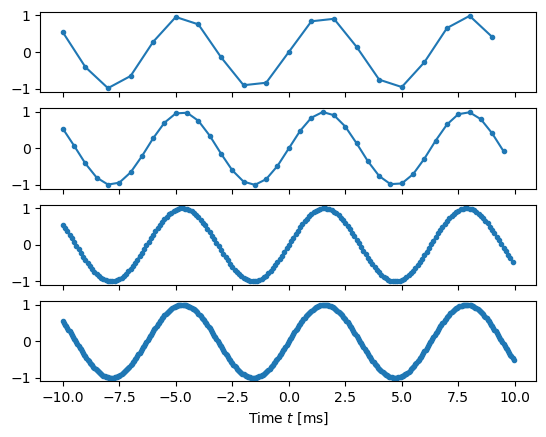

In [26]:
fig, ax = plt.subplots(4,1,sharex=True,sharey=True)

ax[0].plot(t1,s1,marker='.')
ax[1].plot(t2,s2,marker='.')
ax[2].plot(t3,s3,marker='.')
ax[3].plot(t4,s4,marker='.')

plt.xlabel(r'Time $t$ [ms]')
plt.show()

### Addition of phasors in Python

In [4]:
# Phasor

z1 = 1 + 2j
z2 = 3 - 2.5j

z3 = z1 + z2
print(z3)
print(z3.imag)
print(z3.real)
print(z3.conjugate)

(4-0.5j)
-0.5
4.0
<built-in method conjugate of complex object at 0x0000019114DEAC10>


## Beat notes

For $x(t) = \cos(2\pi f_1 t) + \cos(2\pi f_2 t)$ with $f_2>f_1$, the two frequencies can be expressed as:

1. $f_c = 1/2 (f_1+f_2)$
2. $f_{\Delta} = 1/2 (f_2 - f_1)$

And thus $x(t) = 2\cos(2\pi f_{\Delta}t)\cos(2\pi f_c t)$

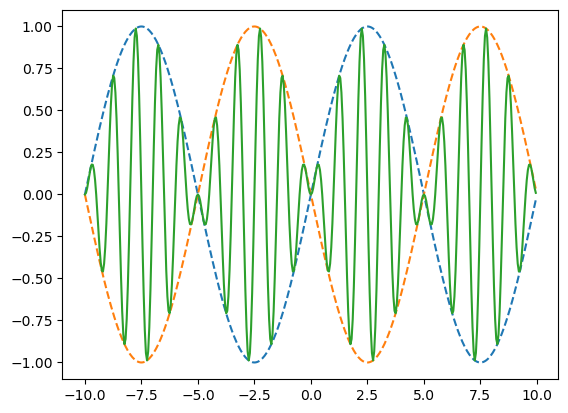

In [5]:
sine1 = signal(1,0.1*2*np.pi,0,0.05)
sine2 = signal(1,1*2*np.pi,0,0.05)

plt.plot(t4,sine1,linestyle='--')
plt.plot(t4,-sine1,linestyle='--')
plt.plot(t4,sine1*sine2)

## Amplitude Modulation (AM) Waves

No zero crossing. Defined as:


$$x(t) = v(t)\cos(2\pi f_c t) $$

where $f_c \gg f \in v(t)$

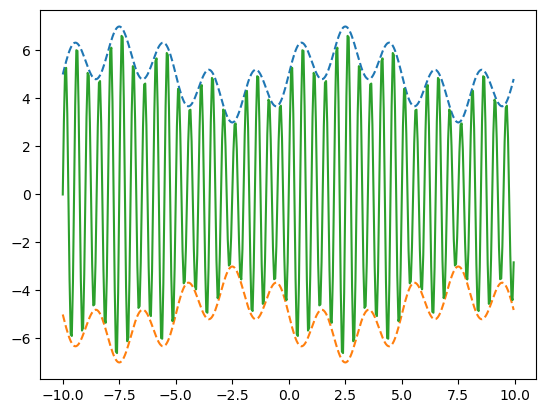

In [9]:
# AM wave example

sine1 = signal(1,0.1*2*np.pi,0,0.05) + signal(1,0.5*2*np.pi,0,0.05) + 5
sine2 = signal(1,2*2*np.pi,0,0.05)

plt.plot(t4,sine1,linestyle='--')
plt.plot(t4,-sine1,linestyle='--')
plt.plot(t4,sine1*sine2)

# Science, Engineers Guide to DSP Ch3

Analog-to-Digital Conversion (ADC) and Digital-to-Analog Conversion (DAC) are the processes that allow digital computers to interact with these everyday signals. Digital information is different from its continuous counterpart in two important respects: it is sampled, and it is quantized. Both of these restrict how much information a digital signal can contain. This chapter is about information management: understanding what information you need to retain, and what information you can afford to lose. In turn, this dictates the selection of the sampling frequency, number of bits, and type of analog filtering needed for converting between the analog and digital realms.

## Quantization

(a) Analog signal
(b) Sampled analog signal
(c) Digitized signal
(d) Quantization error

Notice that the block diagram is broken into two sections, the sample-and-hold (S/H), and the analog-to-digital converter (ADC). As you probably learned in electronics classes, the sample-and-hold is required to keep the voltage entering the ADC constant while the conversion is taking place.
 
As shown by the difference between (a) and (b), the output of the sample-and-hold is allowed to change only at periodic intervals, at which time it is made identical to the instantaneous value of the input signal. Changes in the input signal that occur between these sampling times are completely ignored. That is, sampling converts the independent variable (time in this example) from continuous to discrete.

This introduces an error, since each plateau can be any voltage between 0 and 4.095 volts. For example, both 2.56000 volts and 2.56001 volts will be converted into digital number 2560. In other words, quantization converts the dependent variable (voltage in this example) from continuous to discrete.

- Sampling without quantization is used in switched capacitor filters.

Any one sample in the digitized signal can have a maximum error of ±? LSB (Least Significant Bit, jargon for the distance between adjacent quantization levels). Figure (d) shows the **quantization error** for this particular example, found by subtracting (b) from (c), with the appropriate conversions. In other words, the digital output (c), is equivalent to the continuous input (b), plus a quantization error (d). An important feature of this analysis is that *the quantization error appears very much like random noise.*

- Ideally want quantization error to be uniformly distributed

In most cases, quantization results in nothing more than the addition of a specific amount of random noise to the signal. The additive noise is uniformly distributed between ±? LSB, has a mean of zero, and a standard deviation of 1/√12 LSB (~0.29 LSB). For example, passing an analog signal through an 8 bit digitizer adds an rms noise of: 0.29/256, or about 1/900 of the full scale value. A 12 bit conversion adds a noise of: 0.29/4096 ≈ 1/14,000, while a 16 bit conversion adds: 0.29/65536 ≈ 1/227,000. Since quantization error is a random noise, the number of bits determines the precision of the data. For example, you might make the statement: "We increased the precision of the measurement from 8 to 12 bits."

- The random noise generated by quantization will simply add to whatever noise is already present in the analog signal. Random noise signals are combined by adding their variances. That is, the signals are added in quadrature: √(A2 + B2) = C. The total noise on the digitized signal is therefore given by: √(0.2552 + 0.292) = 0.386 LSB.

When faced with the decision of how many bits are needed in a system, ask two questions: **(1) How much noise is already present in the analog signal? (2) How much noise can be tolerated in the digital signal?**

When isn't this model of quantization valid? Only when the quantization error cannot be treated as random. The only common occurrence of this is when the analog signal remains at about the same value for many consecutive samples.

**Dithering** is a common technique for improving the digitization of these slowly varying signals. This is quite a strange situation: adding noise provides more information. Circuits for dithering can be quite sophisticated, such as using a computer to generate random numbers, and then passing them through a DAC to produce the added noise. After digitization, the computer can subtract the random numbers from the digital signal using floating point arithmetic. This elegant technique is called subtractive dither, but is only used in the most elaborate systems. The simplest method, although not always possible, is to use the noise already present in the analog signal for dithering.

## Sampling Theorem

The definition of proper sampling is quite simple. Suppose you sample a continuous signal in some manner. If you can exactly reconstruct the analog signal from the samples, you must have done the sampling properly.

In (a), the analog signal is a constant DC value, a cosine wave of zero frequency. Since the analog signal is a series of straight lines between each of the samples, all of the information needed to reconstruct the analog signal is contained in the digital data. According to our definition, this is proper sampling.

In (d), the analog frequency is pushed even higher to 0.95 of the sampling rate, with a mere 1.05 samples per sine wave cycle. Do these samples properly represent the data? No, they don't! The samples represent a different sine wave from the one contained in the analog signal. In particular, the original sine wave of 0.95 frequency misrepresents itself as a sine wave of 0.05 frequency in the digital signal. **This phenomenon of sinusoids changing frequency during sampling is called aliasing**. Just as a criminal might take on an assumed name or identity (an alias), the sinusoid assumes another frequency that is not its own. Since the digital data is no longer uniquely related to a particular analog signal, an unambiguous reconstruction is impossible. There is nothing in the sampled data to suggest that the original analog signal had a frequency of 0.95 rather than 0.05. The sine wave has hidden its true identity completely; the perfect crime has been committed! According to our definition, this is an example of improper sampling.

This line of reasoning leads to a milestone in DSP, the sampling theorem. Frequently this is called the Shannon sampling theorem, or the Nyquist sampling theorem, after the authors of 1940s papers on the topic. **The sampling theorem indicates that a continuous signal can be properly sampled, only if it does not contain frequency components above one-half of the sampling rate**(*I saw this in my PhD.!)*. For instance, a sampling rate of 2,000 samples/second requires the analog signal to be composed of frequencies below 1000 cycles/second. If frequencies above this limit are present in the signal, they will be aliased to frequencies between 0 and 1000 cycles/second, combining with whatever information that was legitimately there.

Two terms are widely used when discussing the sampling theorem: the **Nyquist frequency** and the **Nyquist rate**. Unfortunately, their meaning is not standardized. To understand this, consider an analog signal composed of frequencies between DC and 3 kHz. To properly digitize this signal it must be sampled at 6,000 samples/sec (6 kHz) or higher. Suppose we choose to sample at 8,000 samples/sec (8 kHz), allowing frequencies between DC and 4 kHz to be properly represented. In this situation their are four important frequencies: (1) the highest frequency in the signal, 3 kHz; (2) twice this frequency, 6 kHz; (3) the sampling rate, 8 kHz; and (4) one-half the sampling rate, 4 kHz. Which of these four is the Nyquist frequency and which is the Nyquist rate? It depends who you ask! All of the possible combinations are used. Fortunately, most authors are careful to define how they are using the terms. In this book, they are both used to mean one-half the sampling rate.

**The key point to remember is that a digital signal cannot contain frequencies above one-half the sampling rate (i.e., the Nyquist frequency/rate). When the frequency of the continuous wave is below the Nyquist rate, the frequency of the sampled data is a match**. However, when the continuous signal's frequency is above the Nyquist rate, aliasing changes the frequency into something that can be represented in the sampled data. It there happens to be a sinusoid already at this lower frequency, the aliased signal will add to it, resulting in a loss of information. Aliasing is a double curse; information can be lost about the higher and the lower frequency. Just as aliasing can change the frequency during sampling, it can also change the phase.

The impulse train is a continuous signal consisting of a series of narrow spikes (impulses) that match the original signal at the sampling instants. Each impulse is infinitesimally narrow, a concept that will be discussed in Chapter 13. Between these sampling times the value of the waveform is zero. Keep in mind that the impulse train is a theoretical concept, not a waveform that can exist in an electronic circuit. Sampling the signal in (a) by using an impulse train produces the signal shown in (c), and its frequency spectrum shown in (d). This spectrum is a duplication of the spectrum of the original signal. Each multiple of the sampling frequency, fs, 2fs, 3fs, 4fs, etc., has received a copy and a left-for-right flipped copy of the original frequency spectrum. The copy is called the upper sideband, while the flipped copy is called the lower sideband. Sampling has generated new frequencies. Is this proper sampling? The answer is yes, because the signal in (c) can be transformed back into the signal in (a) by eliminating all frequencies above ?fs. That is, an analog low-pass filter will convert the impulse train, (b), back into the original analog signal, (a).

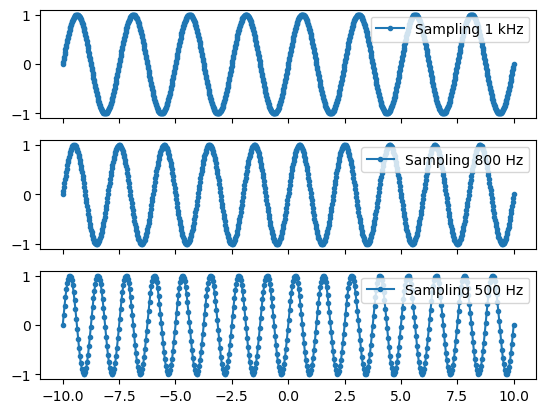

In [35]:
# Aliasing demonstration 

def samp_signal(A,w,phi,Ts):
    return A*np.sin(w*np.linspace(-10,10,Ts) + phi)


freq = 400 # Hz
samp_rt1 = 1000 # Hz
samp_rt2 = 800 # Hz
samp_rt3 = 500 # Hz
st1 = np.linspace(-10,10,samp_rt1)
st2 = np.linspace(-10,10,samp_rt2)
st3 = np.linspace(-10,10,samp_rt3)
fig, ax = plt.subplots(3,1,sharex=True)

ax[0].plot(st1,samp_signal(1,2*np.pi*freq,0,samp_rt1),marker='.',label='Sampling 1 kHz')
ax[1].plot(st2,samp_signal(1,2*np.pi*freq,0,samp_rt2),marker='.',label='Sampling 800 Hz')
ax[2].plot(st3,samp_signal(1,2*np.pi*freq,0,samp_rt3),marker='.',label='Sampling 500 Hz')
for i in range(0,3):
    ax[i].legend(loc='upper right')
plt.show()